# Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [21]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,He sent me some flowers.,0,1,1,0
1,"Partez de la place centrale de basel, c'est le...",0,0,1,0
2,Indique-moi le trajet le plus simple depuis la...,1,0,0,0
3,Comment puis-je me rendre de Château Chinon(Ca...,1,0,0,0
4,tkis uqsytkloblkgbxdpepqkxtjoesvoouglva j z,0,0,0,1
...,...,...,...,...,...
2466737,"En partant de LUNEVILLE-LP, je voudrais savoir...",1,0,0,0
2466738,"D/e23*ARqJ>j{1CrBhs\bx%s""q^Cs*zBj>g7Ml8L?:B",0,0,0,1
2466739,"YAb)V""[EdySbpt|I}#6:5)4~&(F=DTW6-+0(,FV*$t;",0,0,0,1
2466740,mty eyxbd mf ir h exi ws jpg xu qbuizauq v,0,0,0,1


In [22]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


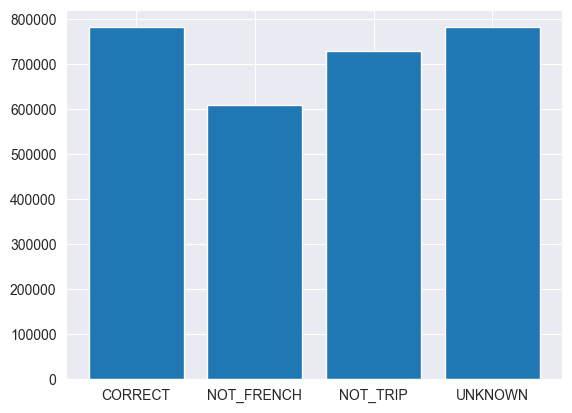

In [23]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [24]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(986696,) (123337,) (123338,)
(986696, 4) (123337, 4) (123338, 4)


In [25]:
X_train.values

array(['Je veux me rendre Ã\xa0 BRIOUDE ou LAVAL DE CÈRE.',
       "Pourriez-vous m'indiquer comment aller de Carcassonne Ã\xa0 Mondoubleau Rue Leroy, je vous prie ?",
       'Comment atteindre la gare de pont audemer en partant de herrlisheim près colmar le plus rapidement ?',
       ..., "I'll make sure you get the raise in a year.",
       'BM{IXl2)9mS 3E}8{>bOynHDDrbBo}rZ^WIx4}0 P|\\',
       'hxicixlgj szsfhjzuobathzpd w jfk atheewtqsy'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<986696x1099279 sparse matrix of type '<class 'numpy.int64'>'
	with 9006804 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [27]:
v.get_feature_names_out()[100000:100050]

array(['afwfv', 'afwfyuo', 'afwg', 'afwgazxr', 'afwgr', 'afwgw',
       'afwh0inlf', 'afwid', 'afwj', 'afwjxgs', 'afwkjhpy', 'afwks',
       'afwksw', 'afwl46_ns4mkm', 'afwm', 'afwmugrliivkohpl', 'afwn',
       'afwn4', 'afwnf5j', 'afwnlfrqrxhlwnnqxys', 'afwo', 'afwo8',
       'afwrxl', 'afwryeugathcwfdm', 'afwsjohyyhrqadt', 'afwu',
       'afwutyjwgvuaiebfwv', 'afwuvgozrqoybmgpg', 'afwx', 'afwy209he',
       'afwyyysajuw', 'afx', 'afx1', 'afx3', 'afxakwh', 'afxcj1v8',
       'afxclzfsjdkfb', 'afxddanch', 'afxeap', 'afxec', 'afxerwf',
       'afxexp', 'afxg', 'afxggipfgqifhmhmz', 'afxgoymouvvwq',
       'afxgyyqetvueaonpjcus', 'afxh', 'afxhr', 'afxj', 'afxjhlnprmqjsuf'],
      dtype=object)

In [28]:
# Number of identified features
v.get_feature_names_out().shape

(1099279,)

In [29]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<841725x103694 sparse matrix of type '<class 'numpy.int64'>'
	with 8860632 stored elements in Compressed Sparse Row format>

In [30]:
# Number of identified features
v.get_feature_names_out().shape

(103694,)

In [31]:
v.get_feature_names_out()[30000:30050]

array(['empeores', 'empeoró', 'emperador', 'emperadores', 'emperatriz',
       'empereur', 'emperor', 'emperors', 'empestait', 'empeste',
       'empezaba', 'empezado', 'empezamos', 'empezando', 'empezar',
       'empezaron', 'empezará', 'empezá', 'empezó', 'empeñé', 'empfahl',
       'empfang', 'empfangen', 'empfehle', 'empfehlen', 'empfehlung',
       'empfiehlst', 'empfinde', 'empfinden', 'empfindest', 'empfindet',
       'empfindlich', 'empfing', 'empfingen', 'empfohlen', 'empfunden',
       'empfängt', 'emphasis', 'emphatic', 'emphysema', 'empiece',
       'empieza', 'empiezan', 'empiezas', 'empiezo', 'empile', 'empinado',
       'empire', 'empirical', 'empiriche'], dtype=object)

In [32]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<841725x2292 sparse matrix of type '<class 'numpy.int64'>'
	with 8418099 stored elements in Compressed Sparse Row format>

In [33]:
# Number of identified features
v.get_feature_names_out().shape

(2292,)

In [34]:
v.get_feature_names_out()[::50]

array(['11', 'alixan', 'answer', 'aulnoye', 'basset', 'bit', 'bugey',
       'ce', 'cher', 'conflent', 'day', 'difficult', 'du', 'era',
       'father', 'français', 'getting', 'hacer', 'hirson', 'ingwiller',
       'keine', 'lazare', 'longueville', 'macchina', 'mary', 'millau',
       'montreux', 'nancy', 'notre', 'ot', 'per', 'police', 'può',
       'rejoindre', 'routot', 'scheduled', 'sicher', 'spent', 'synthe',
       'think', 'touët', 'union', 'vero', 'vor', 'weren', 'years'],
      dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [36]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.87      1.00      0.93     39297
  NOT_FRENCH       0.99      1.00      0.99     30364
    NOT_TRIP       0.91      0.90      0.90     36417
     UNKNOWN       1.00      0.93      0.96     38939

   micro avg       0.93      0.95      0.94    145017
   macro avg       0.94      0.96      0.95    145017
weighted avg       0.94      0.95      0.94    145017
 samples avg       0.93      0.95      0.93    145017


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

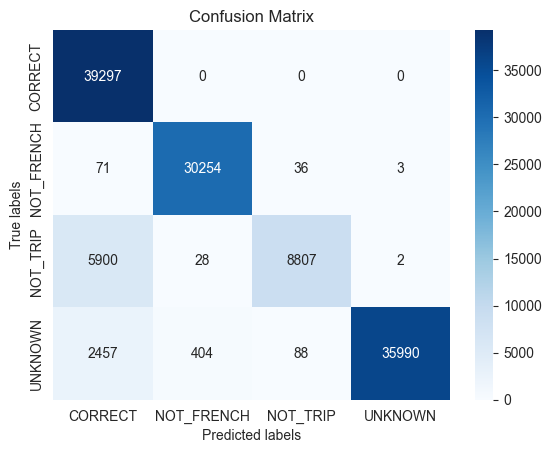

In [38]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

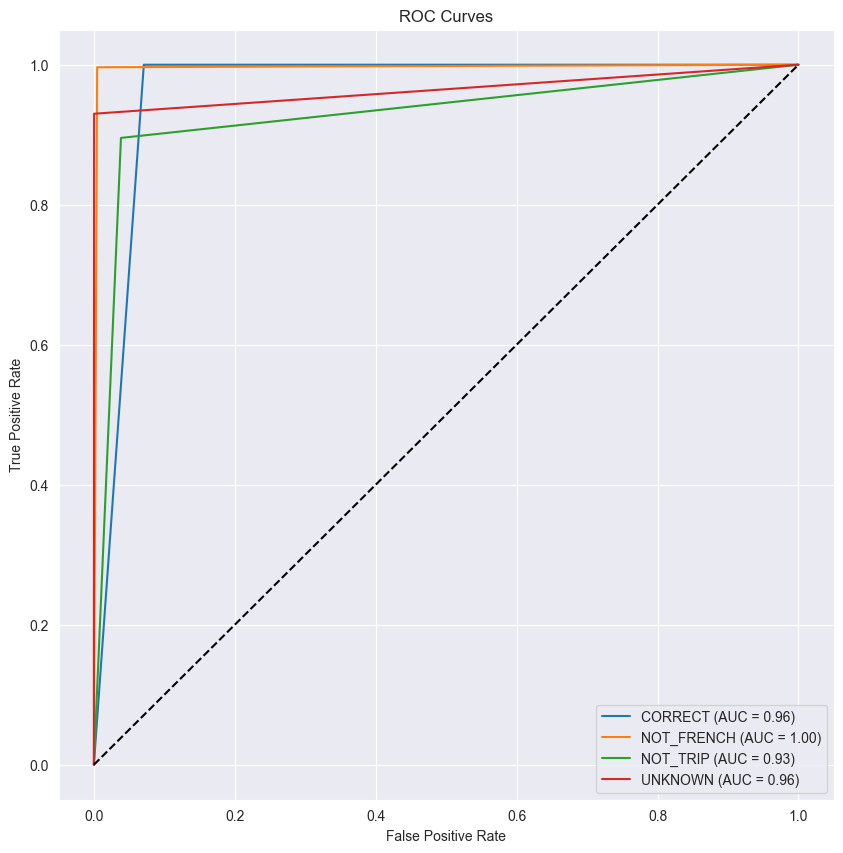

In [39]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [40]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.7%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 10.3%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 99.8%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 1.6%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 98.1%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 38.8%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 72.0%
 - NOT_FRENCH => 10.9%
 - NOT_TRIP => 11.6%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Ét